# Reproduce CheXNet: Explore Predictions

## Import other modules and pandas

In [1]:
import visualize_prediction as V

import pandas as pd

#suppress pytorch warnings about source code changes
import warnings
warnings.filterwarnings('ignore')

## Settings for review
We can examine individual results in more detail, seeing probabilities of disease for test images. 

We get you started with a small number of the images from the large NIH dataset. 

To explore the full dataset, [download images from NIH (large, ~40gb compressed)](https://nihcc.app.box.com/v/ChestXray-NIHCC), extract all tar.gz files to a single folder, place that path  below and set STARTER_IMAGES=False

In [2]:
STARTER_IMAGES=True
PATH_TO_IMAGES = "starter_images/"

#STARTER_IMAGES=False
#PATH_TO_IMAGES = "your path to NIH data here"

Load pretrained model (part of cloned repo; should not need to change path unless you want to point one you retrained)

In [3]:
PATH_TO_MODEL = "pretrained/checkpoint"

Pick the finding you want to see positive examples of:

LABEL can be set to any of:
- Atelectasis
- Cardiomegaly
- Consolidation
- Edema
- Effusion
- Emphysema
- Fibrosis
- Hernia
- Infiltration
- Mass
- Nodule
- Pneumonia
- Pneumothorax


In [4]:
LABEL="Cardiomegaly"

It's more interesting when initially exploring to see cases positive for pathology of interest:

In [5]:
POSITIVE_FINDINGS_ONLY=True

## Load data

This loads up dataloader and fine tuned model (note: only test images not used for model training are loaded).

In [6]:
dataloader,model= V.load_data(PATH_TO_IMAGES,LABEL,PATH_TO_MODEL,POSITIVE_FINDINGS_ONLY,STARTER_IMAGES)
print("Cases for review:")
print(len(dataloader))

Cases for review:
56


## Examine individual cases

To explore, run code below to see a random case positive for your selected finding 
and the model's estimated probabilities for findings

Note how high AUCs can be achieved even if many positive cases are assigned absolutely low probabilities of disease, as AUC depends on the relative ranking of probabilities between cases. 

Can run the below cell repeatedly to see different examples:

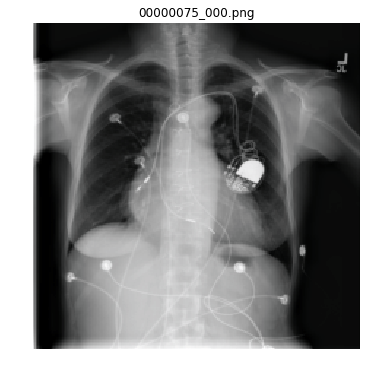

,Predicted Probability,Ground Truth
Finding,,
Infiltration,0.140,False
Atelectasis,0.052,False
Consolidation,0.030,False
Cardiomegaly,0.029,True
Effusion,0.018,False
Nodule,0.013,False
Mass,0.006,False
Pneumonia,0.006,False
Edema,0.006,False


In [7]:
preds=V.show_next(dataloader,model, LABEL)
preds